## Packages

In [1]:
#Importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading of Files

In [2]:
#Viewing of dataset
ibm_df = pd.read_excel('IBM-HR-Employee-Attrition.xlsx')
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Initial Exploration

In [3]:
#Quick analysis
ibm_df.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [4]:
ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Changing Factors to Binary

In [5]:
#Changing Attrition to binary
ibm_df["Attrition"]= ibm_df["Attrition"].replace("Yes", 1) 
ibm_df["Attrition"]= ibm_df["Attrition"].replace("No", 0) 

In [6]:
#Changing Gender to binary
ibm_df["Gender"]= ibm_df["Gender"].replace("Male", 1) 
ibm_df["Gender"]= ibm_df["Gender"].replace("Female", 0) 

In [7]:
#Changing OverTime 
ibm_df["OverTime"]= ibm_df["OverTime"].replace("Yes", 1) 
ibm_df["OverTime"]= ibm_df["OverTime"].replace("No", 0) 

In [8]:
#Changing Over18
ibm_df["Over18"]= ibm_df["Over18"].replace("Y", 1) 
ibm_df["Over18"]= ibm_df["Over18"].replace("N", 0) 

In [9]:
ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
#Saving binary dataset in Excel
ibm_df.to_excel('ibm_df_binary.xlsx',index = False)

## Encoding Categorical Values

In [11]:
#Loading binary file
ibm = pd.read_excel('ibm_df_binary.xlsx')

In [12]:
#Changing Human Resources in Job Role becuase it exists in Department too
ibm["JobRole"]= ibm["JobRole"].replace("Human Resources", "HR Professional") 
ibm['EducationField'] = ibm['EducationField'].replace("Human Resources","HR Education")

In [13]:
#One hot encoding of Categorical Variables
one_hot_BusinessTravel = pd.get_dummies(ibm['BusinessTravel'])
one_hot_EducationField = pd.get_dummies(ibm['EducationField'])
one_hot_Department = pd.get_dummies(ibm['Department'])
one_hot_JobRole = pd.get_dummies(ibm['JobRole'])
one_hot_MaritalStatus = pd.get_dummies(ibm['MaritalStatus'])

In [14]:
#Dropping hot encoded Categorical Variables
ibm = ibm.drop('BusinessTravel', axis = 1)
ibm = ibm.drop('EducationField', axis = 1)
ibm = ibm.drop('Department', axis = 1)
ibm = ibm.drop('JobRole', axis = 1)
ibm = ibm.drop('MaritalStatus', axis = 1)

In [15]:
#Joining hot encoded columns with ibm
ibm = ibm.join([one_hot_BusinessTravel, one_hot_EducationField, one_hot_Department,
               one_hot_JobRole,one_hot_MaritalStatus])

## Correlation

In [16]:
#Running a correlation for the variables
ibm_corr = ibm.corr().round(2)

In [17]:
#Checking correlation based on Attrition
ibm_corr.loc['Attrition'].sort_values(ascending = False)

Attrition                    1.00
OverTime                     0.25
Single                       0.18
Sales Representative         0.16
Travel_Frequently            0.12
Laboratory Technician        0.10
Sales                        0.08
DistanceFromHome             0.08
Technical Degree             0.07
Marketing                    0.06
NumCompaniesWorked           0.04
HR Professional              0.04
HR Education                 0.04
Gender                       0.03
Sales Executive              0.02
Human Resources              0.02
MonthlyRate                  0.02
PerformanceRating            0.00
Research Scientist          -0.00
PercentSalaryHike           -0.01
EmployeeNumber              -0.01
HourlyRate                  -0.01
Other                       -0.02
Education                   -0.03
YearsSinceLastPromotion     -0.03
Life Sciences               -0.03
Travel_Rarely               -0.05
RelationshipSatisfaction    -0.05
Medical                     -0.05
WorkLifeBalanc

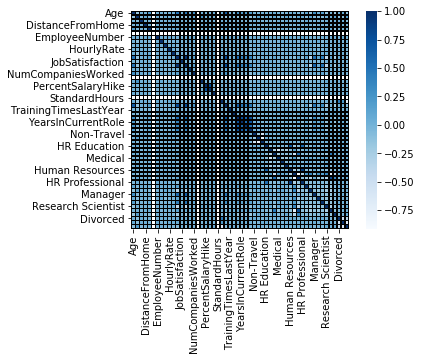

In [18]:
sns.heatmap(data       = ibm_corr,
            cmap       = 'Blues',
            square     = True,
            annot      = False,
            linecolor  = 'black',
            linewidths = 0.5)
plt.show()



## Feuture Engineering

In [19]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1470 non-null   int64
 1   Attrition                  1470 non-null   int64
 2   DailyRate                  1470 non-null   int64
 3   DistanceFromHome           1470 non-null   int64
 4   Education                  1470 non-null   int64
 5   EmployeeCount              1470 non-null   int64
 6   EmployeeNumber             1470 non-null   int64
 7   EnvironmentSatisfaction    1470 non-null   int64
 8   Gender                     1470 non-null   int64
 9   HourlyRate                 1470 non-null   int64
 10  JobInvolvement             1470 non-null   int64
 11  JobLevel                   1470 non-null   int64
 12  JobSatisfaction            1470 non-null   int64
 13  MonthlyIncome              1470 non-null   int64
 14  MonthlyRate             

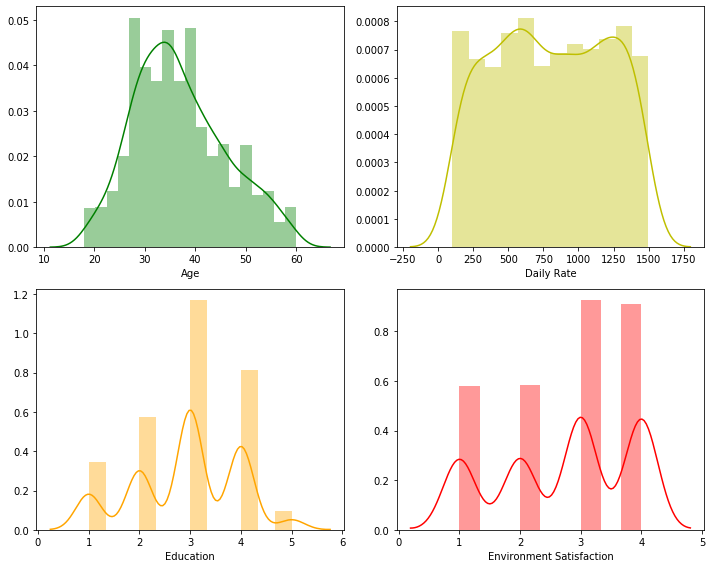

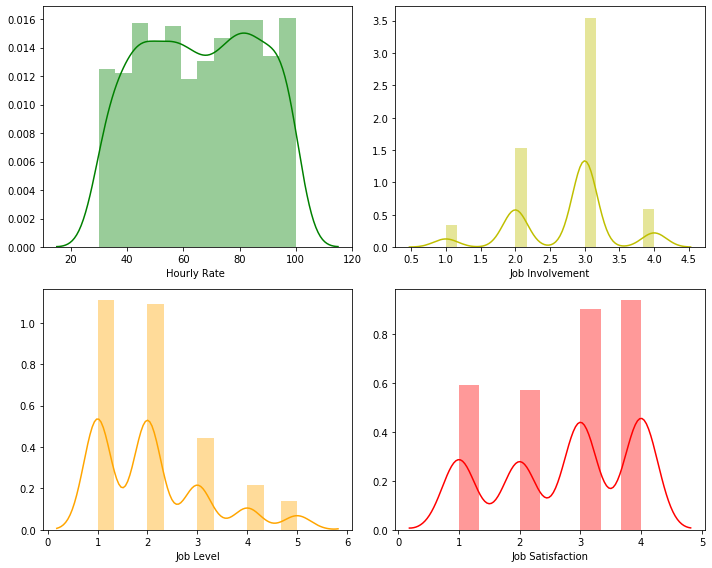

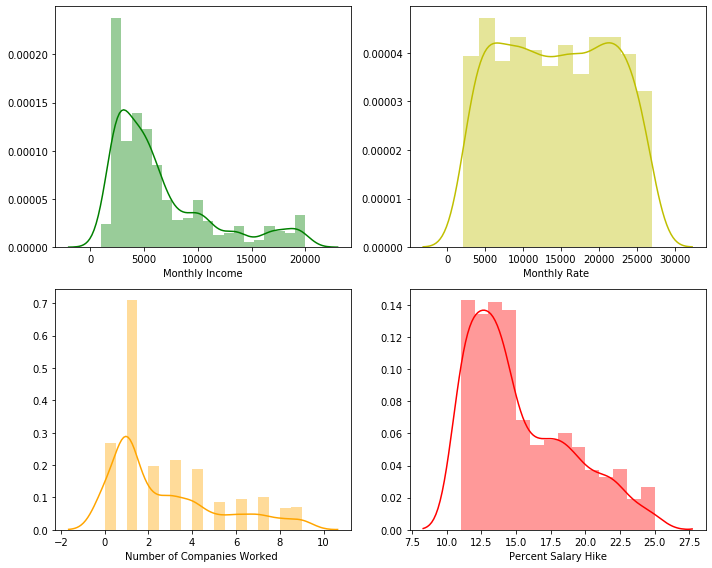

In [28]:
#Visualizing of distribution 

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(ibm['Age'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Age')

########################

plt.subplot(2, 2, 2)
sns.distplot(ibm['DailyRate'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Daily Rate')

########################

plt.subplot(2, 2, 3)
sns.distplot(ibm['Education'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Education')

########################
plt.subplot(2, 2, 4)
sns.distplot(ibm['EnvironmentSatisfaction'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Environment Satisfaction')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(ibm['HourlyRate'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Hourly Rate ')

########################

plt.subplot(2, 2, 2)
sns.distplot(ibm['JobInvolvement'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Job Involvement')

########################

plt.subplot(2, 2, 3)
sns.distplot(ibm['JobLevel'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Job Level')

########################
plt.subplot(2, 2, 4)
sns.distplot(ibm['JobSatisfaction'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Job Satisfaction')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(ibm['MonthlyIncome'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Monthly Income')

########################

plt.subplot(2, 2, 2)
sns.distplot(ibm['MonthlyRate'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Monthly Rate ')

########################

plt.subplot(2, 2, 3)
sns.distplot(ibm['NumCompaniesWorked'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Number of Companies Worked ')

########################
plt.subplot(2, 2, 4)
sns.distplot(ibm['PercentSalaryHike'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Percent Salary Hike')
plt.tight_layout()
plt.show()

########################
#######################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(ibm['MonthlyIncome'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Monthly Income')

########################

plt.subplot(2, 2, 2)
sns.distplot(ibm['MonthlyRate'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Monthly Rate ')

########################

plt.subplot(2, 2, 3)
sns.distplot(ibm['NumCompaniesWorked'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Number of Companies Worked ')

########################
plt.subplot(2, 2, 4)
sns.distplot(ibm['PercentSalaryHike'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Percent Salary Hike')
plt.tight_layout()
plt.show()

########################

